y = 0.14940032500737416x + -4.85722573273506e-17
MSE = 1.084498435824864


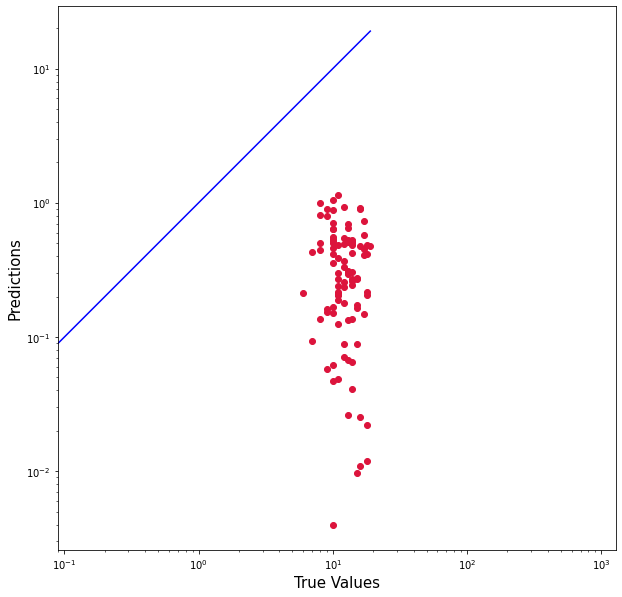

In [28]:
# implement multilinear regression without using any libraries on Lab_3.1/student-por.csv

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data from csv file
def read_data(filename):
    data = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

# convert data to numpy array
def convert_to_numpy(data):
    data = np.array(data)
    return data

# convert data to float
def convert_to_float(data):
    data = data.astype(np.float)
    return data


# split data into train and test
def split_data(data):
    train = data[:int(len(data)*0.8)]
    test = data[int(len(data)*0.8):]
    return train, test


# calculate mean
def mean(data):
    return np.mean(data, axis=0)


# calculate standard deviation
def std(data):
    return np.std(data, axis=0)


# implement mlr
def mlr(train, test):
    # calculate mean and std
    train_mean = mean(train)
    train_std = std(train)

    # normalize data
    train = (train - train_mean) / train_std  # normalize train data
    test = (test - train_mean) / train_std

    # add bias
    train = np.insert(train, 0, 1, axis=1) # add bias to train data by adding a column of 1s
    test = np.insert(test, 0, 1, axis=1)  # add bias to test data by adding a column of 1s

    # split train and test data
    train_x = train[:, :-1]
    train_y = train[:, -1]
    test_x = test[:, :-1]
    test_y = test[:, -1]

    # calculate weights using normal equation method (w = (X^T * X)^-1 * X^T * y) 
    weights = np.dot(np.dot(np.linalg.inv(np.dot(train_x.T, train_x)), train_x.T), train_y)


    # calculate predictions using test data and weights calculated above (y = X * w) using dot product
    predictions = np.dot(test_x, weights)
    
 
    # calculate error using mean squared error (MSE) (MSE = 1/n * sum((y - y_hat)^2))
    error = np.sum(np.square(predictions - test_y)) / len(test_y)
    print('y = {}x + {}'.format(weights[1], weights[0]))
    print("MSE =", error)
    

    return predictions


# main function
def main():
    # read data
    data = pd.read_csv('student-por.csv',delimiter=';')
    X = data.drop('G3',axis=1)
    y = data['G3']
    X = pd.get_dummies(X, drop_first=True)  # oaky
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    from sklearn.preprocessing import MinMaxScaler
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    pred = mlr(X_train, X_test)
    # implement mlr
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(pred), max(y_test))
    p2 = min(min(pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

    
    # print error

if __name__ == '__main__':
    main()